<a href="https://colab.research.google.com/github/satyhim/Machine_Learning/blob/main/Homework2_Local_Outlier_Factor_(LOF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Outlier detection with Local Outlier Factor (LOF)**

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods. See User Guide: for details on the difference between outlier detection and novelty detection and how to use LOF for novelty detection.

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Sales Variable Analysis

In [ ]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

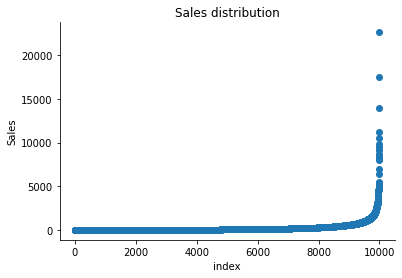

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


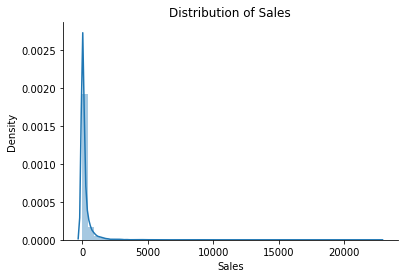

In [ ]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


The Superstore’s sales distribution is far from a normal distribution, and it has a positive long thin tail, the mass of the distribution is concentrated on the left of the figure. And the tail sales distribution far exceeds the tails of the normal distribution.
There are one region where the data has low probability to appear which is on the right side of the distribution.

# Profit Variable Analysis

In [ ]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

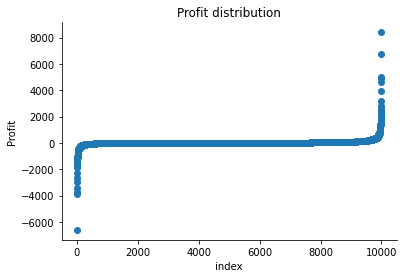

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


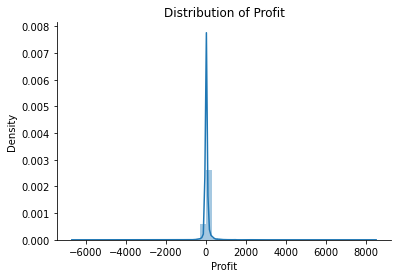

In [ ]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


The Superstore’s Profit distribution has both a positive tail and negative tail. However, the positive tail is longer than the negative tail. So the distribution is positive skewed, and the data are heavy-tailed or profusion of outliers.
There are two regions where the data has low probability to appear: one on the right side of the distribution, another one on the left.

In [ ]:
LocalOutlier_forest = LocalOutlierFactor(n_neighbors=20,novelty=True, contamination=0.01)
LocalOutlier_forest.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = LocalOutlier_forest.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = LocalOutlier_forest.predict(df['Sales'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_sales')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales
3233,3234,US-2017-156356,16-04-2017,22-04-2017,Standard Class,ND-18370,Natalie DeCherney,Consumer,United States,Houston,...,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-4.212000e+08,-1
7366,7367,CA-2016-127243,28-11-2016,04-12-2016,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,...,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-4.212000e+08,-1
3737,3738,CA-2016-115476,17-03-2016,17-03-2016,Same Day,VM-21835,Vivian Mathis,Consumer,United States,Newark,...,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-4.132000e+08,-1
8546,8547,CA-2016-119074,27-03-2016,31-03-2016,Standard Class,DS-13180,David Smith,Corporate,United States,Columbus,...,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-4.132000e+08,-1
8151,8152,CA-2017-140151,23-03-2017,25-03-2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,OFF-ST-10001558,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,-3.796000e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,2702,CA-2014-145317,18-03-2014,23-03-2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936,3,0.2,5.9175,1.556000e+08,1
7848,7849,CA-2016-104311,02-05-2016,06-05-2016,Standard Class,AS-10090,Adam Shillingsburg,Consumer,United States,Irving,...,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,18.936,3,0.2,-3.7872,1.556000e+08,1
7576,7577,CA-2014-134726,02-11-2014,07-11-2014,Second Class,SW-20755,Steven Ward,Corporate,United States,Seattle,...,TEC-AC-10000023,Technology,Accessories,"Maxell 74 Minute CD-R Spindle, 50/Pack",41.940,2,0.0,15.0984,1.556000e+08,1
8129,8130,CA-2014-127866,20-07-2014,23-07-2014,First Class,JD-15895,Jonathan Doherty,Corporate,United States,Riverside,...,TEC-AC-10000023,Technology,Accessories,"Maxell 74 Minute CD-R Spindle, 50/Pack",41.940,2,0.0,15.0984,1.556000e+08,1


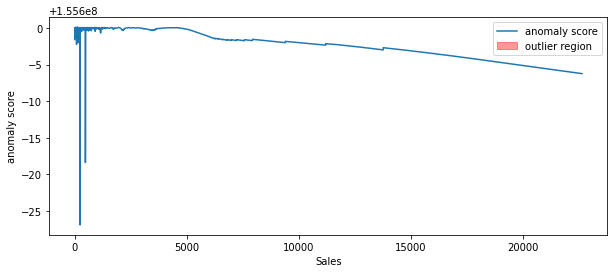

In [ ]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = LocalOutlier_forest.decision_function(xx)
outlier = LocalOutlier_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [ ]:
LocalOutlier_forest = LocalOutlierFactor(n_neighbors=20,novelty=True, contamination=0.01)
LocalOutlier_forest.fit(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = LocalOutlier_forest.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_univariate_profit'] = LocalOutlier_forest.predict(df['Profit'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
1566,1567,CA-2015-129112,29-11-2015,30-11-2015,First Class,AW-10840,Anthony Witt,Consumer,United States,Allen,...,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,21.480,3,0.2,-0.2685,1.556000e+08,1,-1.845327e+09,-1
1496,1497,CA-2017-152485,04-09-2017,08-09-2017,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,...,Storage,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098,1.556000e+08,1,-1.537152e+09,-1
7413,7414,CA-2017-121125,30-05-2017,03-06-2017,Standard Class,MG-17890,Michael Granlund,Home Office,United States,Tigard,...,Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,13.592,1,0.2,-0.3398,1.556000e+08,1,-8.433075e+08,-1
4660,4661,CA-2015-112130,03-05-2015,07-05-2015,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,...,Accessories,SanDisk Cruzer 16 GB USB Flash Drive,27.552,3,0.2,-0.3444,1.556000e+08,1,-8.433075e+08,-1
3228,3229,CA-2014-108189,02-10-2014,05-10-2014,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,...,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,7.160,1,0.2,-0.0895,1.556000e+08,1,-7.883225e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,6918,CA-2014-124247,16-12-2014,21-12-2014,Standard Class,SH-20635,Stefanie Holloman,Corporate,United States,Sacramento,...,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,1.556000e+08,1,6.192750e+07,1
9759,9760,CA-2016-146913,31-10-2016,05-11-2016,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,...,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,1.556000e+08,1,6.192750e+07,1
9143,9144,US-2017-166688,20-05-2017,26-05-2017,Standard Class,RD-19480,Rick Duston,Consumer,United States,Las Vegas,...,Phones,Motorola L703CM,1123.128,9,0.2,70.1955,1.556000e+08,1,6.192750e+07,1
3840,3841,CA-2014-126760,26-07-2014,02-08-2014,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,Accessories,Logitech Illuminated Ultrathin Keyboard with B...,170.970,3,0.0,70.0977,1.556000e+08,1,6.192750e+07,1


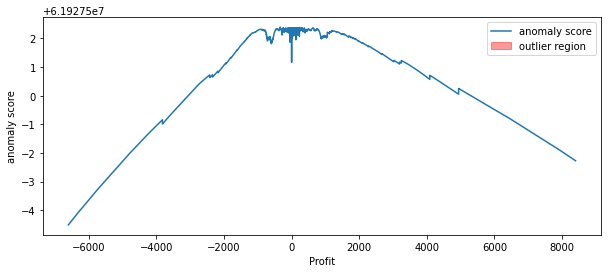

In [ ]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = LocalOutlier_forest.decision_function(xx)
outlier = LocalOutlier_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [ ]:
df[(df['outlier_univariate_profit']==-1) & (df['outlier_univariate_sales']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
63,64,CA-2015-135545,24-11-2015,30-11-2015,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,...,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6,0.2,9.3612,-2.872000e+08,-1,-5.038750e+07,-1


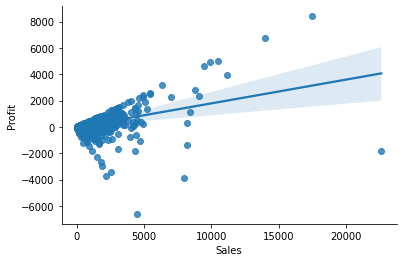

In [ ]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

From the above correlation chart, we can see that some of the data points are
obvious outliers such as extreme low and extreme high values.

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])

In [ ]:
clf = LocalOutlierFactor(n_neighbors=100,novelty=True, contamination=0.01)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)

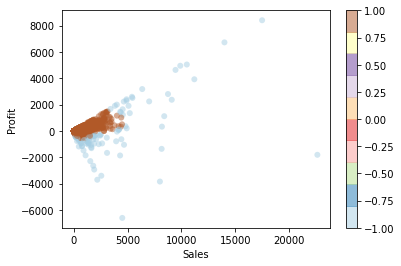

In [ ]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

In [ ]:
df[(df['outlier_univariate_sales'] == 1) & (df['outlier_univariate_profit'] == 1) & (df['multivariate_outlier'] == -1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit,multivariate_anomaly_score,multivariate_outlier
27,28,US-2015-150630,17-09-2015,21-09-2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3083.430,7,0.5,-1665.0522,1.556000e+08,1,6.192750e+07,1,-1.548642,-1
165,166,CA-2014-139892,08-09-2014,12-09-2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,8159.952,8,0.4,-1359.9920,1.556000e+08,1,6.192750e+07,1,-2.604282,-1
169,170,CA-2014-139892,08-09-2014,12-09-2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,177.980,5,0.8,-453.8490,1.556000e+08,1,6.192750e+07,1,-0.066652,-1
215,216,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,...,1188.000,9,0.7,-950.4000,1.556000e+08,1,6.192750e+07,1,-0.438146,-1
262,263,US-2014-106992,19-09-2014,21-09-2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,3059.982,3,0.4,-509.9970,1.556000e+08,1,6.192750e+07,1,-0.377032,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231,9232,CA-2014-148383,27-12-2014,31-12-2014,Standard Class,RP-19390,Resi Pölking,Consumer,United States,Phoenix,...,946.764,6,0.7,-694.2936,1.556000e+08,1,6.192750e+07,1,-0.082819,-1
9270,9271,US-2017-102183,21-08-2017,28-08-2017,Standard Class,PK-19075,Pete Kriz,Consumer,United States,New York City,...,4305.552,6,0.2,1453.1238,1.556000e+08,1,6.192750e+07,1,-0.117475,-1
9480,9481,CA-2014-126193,07-09-2014,14-09-2014,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,...,304.990,5,0.8,-533.7325,1.556000e+08,1,6.192750e+07,1,-0.127277,-1
9639,9640,CA-2015-116638,28-01-2015,31-01-2015,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,4297.644,13,0.4,-1862.3124,1.556000e+08,1,6.192750e+07,1,-1.753178,-1


In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['Sales','Profit']].values
y_pred = clf.fit_predict(X)

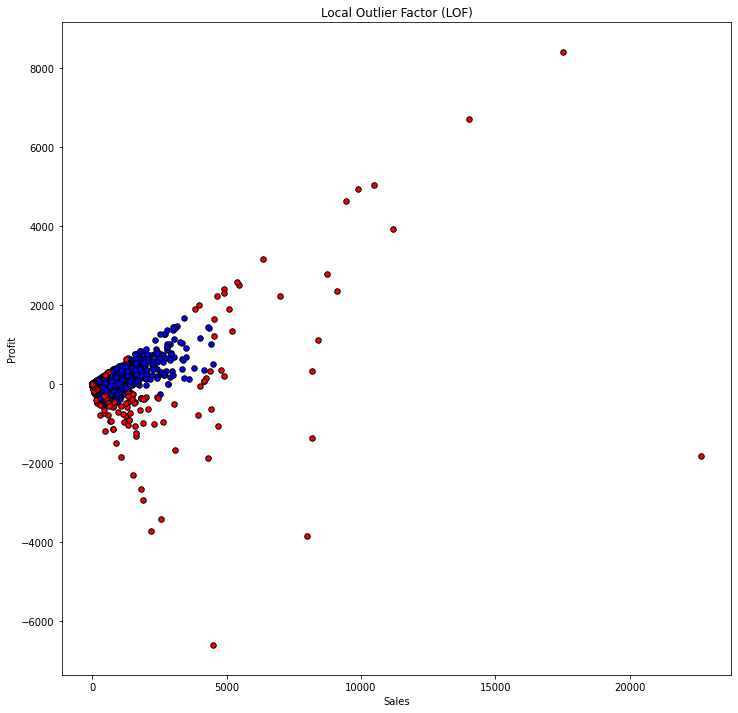

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Sales');
plt.ylabel('Profit');
plt.show()